# The minimizers of Motzkin polynomial

In [1]:
using DynamicPolynomials, MomentPolynomialOpt, Plots
using JuMP, MosekTools; mpo_optimizer(JuMP.optimizer_with_attributes(Mosek.Optimizer, "QUIET" => true));

We use Mosek solver for the convex optimization on SDP matrices.

In [2]:
X  = @polyvar x y
motz = x^4*y^2 + x^2*y^4 - 3x^2*y^2  + 1 

1 - 3x²y² + x²y⁴ + x⁴y²

This is Motzkin polynomial, which is non-negative but not a sum of squares.

![Motzkin](Motzkin.png)

We construct a moment relaxation of order 6 to minimize the polynomial:

In [3]:
v, M = minimize(motz,[],[],X,6)

(-1.1921921828168573, A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`Vector{AffExpr}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Dual model with Mosek attached
Names registered in the model: mu, type)

In [4]:
v

-1.1921921828168573

The objective value is a lower bound of the actual mimimal value $0$ of Motzkin polynomial.

We extract a measure from the sequence of moments, using the function `MultivariateSeries.decompose`:

In [5]:
w, Xi = get_measure(M)

([0.0007847812864387818, 0.01442078961606172, 0.000855168713959057, 0.012759329837717116, 0.19609007177858975, 0.07129843111100391, 0.17818242964673894, 0.17818242964698247, 0.07129843111270494, 0.1960900717783804, 0.01275932983760766, 0.0008551687139593293, 0.014420789616052624, 0.0007847812864368912], [33.39018462584022 27.237543868961986 … -27.237543868961552 -33.39018462584031; -7.146895414699206 -3.308113849323285 … 3.3081138493257023 7.146895414697829])

 `w` is the vector of weights and `Xi` is the matrix of points, that is support of the measure $\mu=\sum_i \omega_i \delta_{\Xi_i}$. `w[i]` is the weight of the Dirac measure corresponding to the point `Xi[:,i]` in this decomposition.

Here no point is found to approximate the optimal moment sequence.

Now, to find the minimizers, we add as constraints, that the gradient of the polynomial should vanish:

In [6]:
J = differentiate(motz,X)
v, M = minimize(motz, J,[], X, 6)

(3.425090500108752e-8, A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 73 constraints
`Vector{AffExpr}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Dual model with Mosek attached
Names registered in the model: mu, type)

In [7]:
w, Xi = get_measure(M)

(ComplexF64[0.25000028956448117 + 1.4918418637799463e-23im, 0.24999968340019016 - 6.767712034451609e-23im, 0.24999968340017856 + 3.176936022629937e-23im, 0.25000028956448256 - 1.2537555165367308e-23im], ComplexF64[1.0000003685469332 + 8.154416838895276e-24im 0.9999964344389767 - 3.965973056337318e-22im -0.9999964344389749 + 1.878308219862739e-22im -1.0000003685469334 - 4.195130962576437e-24im; -1.0000001261049654 + 1.2507413672821288e-23im 0.9999908620389898 - 6.0830917241708295e-22im -0.9999908620389871 + 2.8809881019086467e-22im 1.0000001261049656 - 6.434578871450769e-24im])

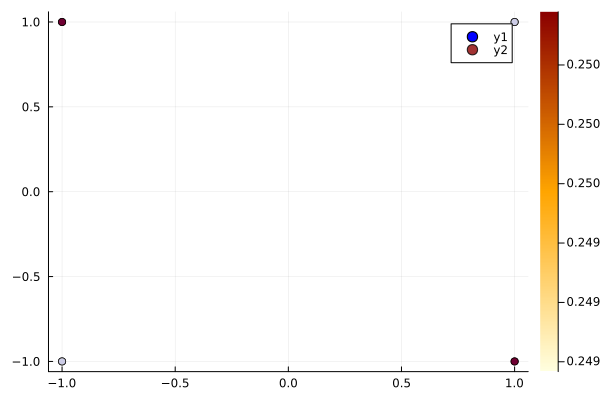

In [8]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue, fmt=:png)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)), fmt=:png)

We find approximately the $4$ minimizers.


Finally, to find the minimizers, we try another strategy and add the constraint that the polynomial should vanish, since we know that its minimal value (at the minimizers) is $0$:

In [9]:
v, M = minimize(motz, [motz], [], X, 6)

(1.028768181754458e-10, A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 29 constraints
`Vector{AffExpr}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Dual model with Mosek attached
Names registered in the model: mu, type)

In [10]:
w, Xi = get_measure(M)

([0.25003007647181474, 0.24996985619099824, 0.2499698561909996, 0.2500300764718131], [-0.9999911812188281 0.9999443473155901 -0.9999443473155901 0.999991181218828; 1.000023211308422 1.0000210418583717 -1.0000210418583717 -1.0000232113084222])

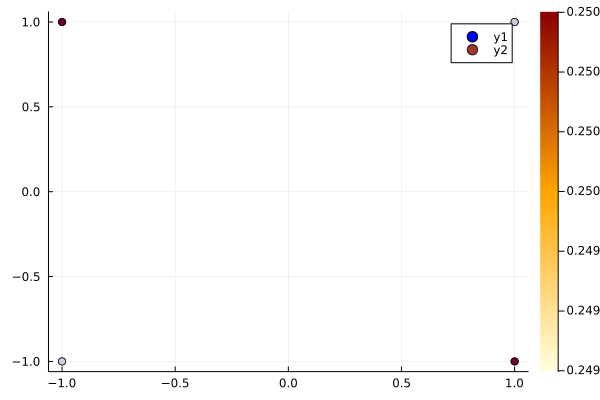

In [11]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue, fmt=:png)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)), fmt=:png)

The minimizers (in red) are close to that actual minimizers (in blue).